In [1]:
#Algorithm that takes data along a line from post processed dataset. 

## Uploads dataset from PP code
import numpy as np
import math 
from numpy import genfromtxt
data_ave = genfromtxt('dataa.csv' , delimiter = ',')

In [2]:
# Helper function that assigns weights to points based on distance to reference point
def weight(P_i, P_0): 
    # P_0 corresponds to reference point, P_i corresponds to the point being weighed
    # Arguments are 1 x 5 arrays where columns 2, 3 and 4 correspond to coordinates (x, y, z) 
    
    # Distance between P_0 and P_i
    distance = math.sqrt(((P_i[2]-P_0[2])**2)+((P_i[3]-P_0[3])**2)+((P_i[4]-P_0[4])**2)) 
    if distance!=0:
        W = 1/distance # Simple inverse relation for points around P_0
        return W
    else:
        W = 0 # P_0 is not weighed against itself
        return W

dh = 0.001 # Height step of graph 
stress = []
posdata = data_ave[:, (15, 16, 17)] # Data array with only positional entries (x, y, z)

for i in range(700):
    h = -0.1+(i*dh) # Height of analysis (algorithm iterates for several heights along a line)
    pos = np.array([10, 10, h]) # Position of analysis
    dis = []
    S_i = 0
    
    for j in range(len(posdata)): 
        # Calculates the distance between every data point and point of analysis
        dis = np.concatenate((dis, np.array([np.linalg.norm((posdata[j]-pos))])), axis = 0)
    
    # Tagging - Associates distances with stresses and then sorts by distance 
    datasort = np.transpose(np.vstack((dis, data_ave[:, 10], data_ave[:, 15], data_ave[:, 16], data_ave[:, 17])))
    datasort = datasort[datasort[:,0].argsort()]
    W = []
    pos5 = np.concatenate((np.array([0, 0]), pos), axis=0)
    
    for k in range(50): # Performs weighing for n+1 closest points 
            W_k = weight(datasort[int(k), :], pos5) 
            S_i = S_i + (W_k*datasort[int(k), 1])
            W = np.concatenate((W, np.array([W_k])), axis = 0)
            
    if sum(W)!=0:
        S_i = S_i/sum(W)
    else: 
        S_i = datasort[0, 1] # In case algorithm crashes, it reverts back to the closest point

    stress = np.concatenate((stress, np.array([S_i])), axis = 0) # Adds the calculated stress value
    

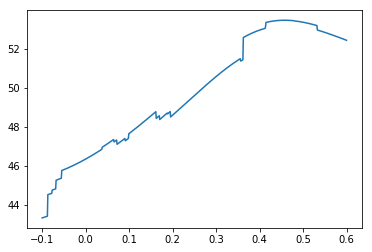

In [4]:
import matplotlib.pyplot as plt
height = np.linspace(-0.1, 0.6, num = 700)
plt.plot(height, stress)

[9 1]
